# A Closer Look at Property Prices in Toronto 

In this notebook, we will be segmenting and clustering the neighborhoods in the city of Toronto based on their features. 

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from IPython.display import Image

In [6]:
on_prop_df = pd.read_csv('data/ontario_properties.csv')
on_prop_df.head()

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [7]:
on_prop_df.shape

(25351, 6)

### Cleaning the properties dataset

The dataset contains 25,351 properties for the entire province of Ontario. Let's first filter the properties only keep the ones in the the city of Toronto.

In [99]:
to_prop_df = on_prop_df[on_prop_df['Address'].str.contains("Toronto")]
to_prop_df.head()

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
5,7,"254A Monarch Park Ave Toronto, ON",Old East York,1488000,43.686375,-79.328918
6,8,"532 Caledonia Rd Toronto, ON",Fairbank,25,43.691193,-79.461662
11,19,"47 Armstrong Ave Toronto, ON",Wallace Emerson,113,43.664101,-79.439751


In [100]:
to_prop_df.shape

(5092, 6)

Keep the last five columns.

In [101]:
to_prop_df = to_prop_df[['Address' , 'AreaName', 'Price ($)', 'lat', 'lng']]
to_prop_df.head()

,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
5,"254A Monarch Park Ave Toronto, ON",Old East York,1488000,43.686375,-79.328918
6,"532 Caledonia Rd Toronto, ON",Fairbank,25,43.691193,-79.461662
11,"47 Armstrong Ave Toronto, ON",Wallace Emerson,113,43.664101,-79.439751


Let's see if the dataset contains any NaN values.

In [102]:
to_prop_df.isnull().sum().sum()

0

Rename the colummns

In [103]:
to_prop_df.rename(columns={'AreaName':'Neighborhood', 'Price ($)': 'Price', 'lat':'Latitude', 'lng':'Longitude'}, inplace=True)
to_prop_df.head()

,Address,Neighborhood,Price,Latitude,Longitude
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
5,"254A Monarch Park Ave Toronto, ON",Old East York,1488000,43.686375,-79.328918
6,"532 Caledonia Rd Toronto, ON",Fairbank,25,43.691193,-79.461662
11,"47 Armstrong Ave Toronto, ON",Wallace Emerson,113,43.664101,-79.439751


Notice that we also have some prices that are too low to be any real proprties. For example, index 6 shows a property that is valued at 25 dollars! We can filter any rows that have a value of less than $50,000 since we like to focus this report on larger sized properties (houses, commerical, etc). 

In [104]:
to_prop_df = to_prop_df[to_prop_df['Price'] > 50000]
to_prop_df.head()

,Address,Neighborhood,Price,Latitude,Longitude
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
5,"254A Monarch Park Ave Toronto, ON",Old East York,1488000,43.686375,-79.328918
12,"3 Bracebridge Ave Toronto, ON",Old East York,599900,43.697842,-79.317368
15,"#710 - 1080 Bay St Toronto, ON",Downtown,805900,43.666794,-79.388756


After cleaning the dataset let's see how many properties we have.

In [105]:
to_prop_df.shape

(4906, 5)

In [111]:
mean_price = to_prop_df
mean_price = to_prop_df.groupby(['Neighborhood'], sort=False).mean()
mean_price.reset_index(inplace=True)
mean_price.head()

,Neighborhood,Price,Latitude,Longitude
0,Richview,727238.400000,43.684286,-79.559077
1,Downtown,603469.396552,43.652373,-79.383767
2,Old East York,495580.852941,43.692981,-79.314033
3,Dorset Park,415448.324324,43.757442,-79.277790
4,Morningside,404669.478261,43.787621,-79.202888


Let's see how many neighborhoods we have in our dataset.

In [112]:
mean_price.shape

(212, 4)

In [113]:
# mean_price['Price'] = mean_price['Price'].map('${:,.2f}'.format)
# mean_price.head()

### Visualize

Let's first look at the historgram of the prices.

In [114]:
import matplotlib.pyplot as plt
import folium

In [115]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(mean_price['Price'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[192  13   5   1   0   0   0   0   0   1]
[   75000.          1585828.57142857  3096657.14285714  4607485.71428571
  6118314.28571429  7629142.85714286  9139971.42857143 10650800.
 12161628.57142857 13672457.14285714 15183285.71428571]


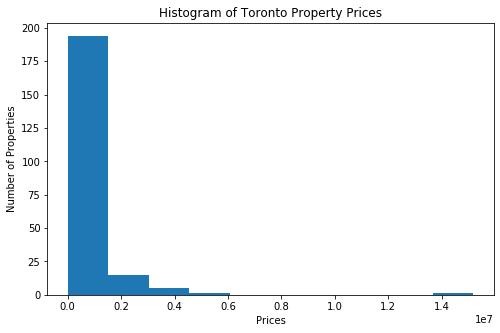

In [55]:
mean_price['Price'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Toronto Property Prices')
plt.xlabel('Prices')
plt.ylabel('Number of Properties') 
plt.show()

### Visualize prices in each neighborhoods in Toronto

In [116]:
toronto_price_map = folium.Map(location=[43.650571,-79.384568],zoom_start=11)

for lat,lng,neighborhood,price in zip(
    mean_price['Latitude'],
    mean_price['Longitude'],
    mean_price['Neighborhood'],
    mean_price['Price']):
    
    label = '{}, ${:,.2f}'.format(neighborhood, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(toronto_price_map)
    
toronto_price_map

The map does not show in Github, so here's an image of it:

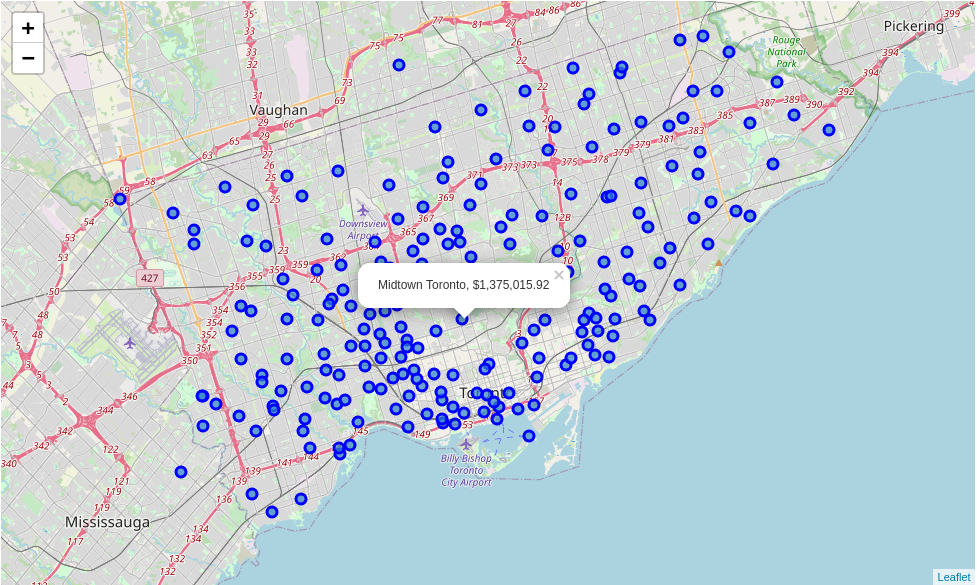

In [117]:
PATH = "img/toronto_price_map.png"
Image(filename = PATH, width=1000, height=800)

### Get Venues for each Neighborhood in Toronto using Location Data from Foursquare API

In [120]:
# the following method uses the Foursquare API to get some venues nearby a given location
def getNearbyVenues(client_id, client_secret, version, names, latitudes, longitudes, radius=100, limit=20):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [182]:
client_id = '1VJXHOYL2MN3CJLNT2WQULQUVH23FXNYFF4TXUJ1SGODM4OT' # your Foursquare ID
client_secret = 'M0PEUL50VU0UGFYSACJCJWTJ5OL33NSJVTIQAZOPOKROZLCU' # your Foursquare Secret
version = '20180604'\

toronto_venues = getNearbyVenues(client_id=client_id,
                                  client_secret=client_secret,
                                  version=version,
                                  names=mean_price['Neighborhood'],
                                  latitudes=mean_price['Latitude'],
                                  longitudes=mean_price['Longitude']
                                  )

Let's see how many venues we have in each neighborhood

In [183]:
print(toronto_venues.shape)
toronto_venues.head()

(285, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown,43.652373,-79.383767,Nathan Phillips Square,43.652270,-79.383516,Plaza
1,Downtown,43.652373,-79.383767,The Cambridge Club,43.651663,-79.383075,Gym
2,Downtown,43.652373,-79.383767,Noodle King,43.651706,-79.383046,Asian Restaurant
3,Dorset Park,43.757442,-79.277790,Pho Vietnam,43.757770,-79.278572,Vietnamese Restaurant
4,Dorset Park,43.757442,-79.277790,Tech source,43.757008,-79.278262,Electronics Store


In [184]:
print("total neighborhoods with venues: ", toronto_venues.groupby(['Neighborhood']).count().shape[0])

total neighborhoods with venues:  84


### Analyze Each Neighborhood

Let's check how many venues were returned for each neighborhood

In [185]:
venue_counts = toronto_venues.groupby('Neighborhood').count().reset_index()
venue_counts.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alderwood,1,1,1,1,1,1
1,Amesbury,2,2,2,2,2,2
2,Bay Cloverhill,15,15,15,15,15,15
3,Bayview Woods - Steeles,1,1,1,1,1,1
4,Belgravia,2,2,2,2,2,2


In [186]:
venue_counts.shape

(84, 7)

Let's find out how many unique categories can be curated from all the returned venues

In [187]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 120 uniques categories.


In [188]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = mean_price['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Taco Place,Thai Restaurant,Tourist Information Center,Trail,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,Richview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Old East York,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dorset Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Morningside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
toronto_onehot.shape

(285, 121)

In [190]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Taco Place,Thai Restaurant,Tourist Information Center,Trail,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alderwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amesbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Armdale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
toronto_grouped.shape

(212, 121)

Now let's merge all the data we have on each neighhborhood, including price, venues (one-hot-encoded), and total number of unique venues.

In [192]:
venue_counts = venue_counts[['Neighborhood', 'Venue Category']]
venue_counts.rename(columns={'Venue Category':'Venue Count'}, inplace=True)
venue_counts.head()

,Neighborhood,Venue Count
0,Alderwood,1
1,Amesbury,2
2,Bay Cloverhill,15
3,Bayview Woods - Steeles,1
4,Belgravia,2


In [193]:
venue_counts.shape

(84, 2)

First merge the mean_price dataframe with the 'venue category' of vanue_counts dataframe 

In [194]:
toronto_merged = pd.merge(mean_price, venue_counts, how='inner', on='Neighborhood', sort=True)
toronto_merged.head()

,Neighborhood,Price,Latitude,Longitude,Venue Count
0,Alderwood,9.931799e+05,43.603214,-79.545025,1
1,Amesbury,7.945000e+04,43.704548,-79.482700,2
2,Bay Cloverhill,2.490000e+05,43.665531,-79.385147,15
3,Bayview Woods - Steeles,1.290222e+06,43.792517,-79.390080,1
4,Belgravia,1.365250e+06,43.697310,-79.445359,2


Also, merge the one-hot-encoded vanues for each neighborhood from toronto_grouped dataframe.

In [195]:
toronto_merged = pd.merge(toronto_merged, toronto_grouped , how='inner', on='Neighborhood', sort=True)
toronto_merged.head()

,Neighborhood,Price,Latitude,Longitude,Venue Count,ATM,Accessories Store,Adult Boutique,American Restaurant,Arts & Crafts Store,...,Taco Place,Thai Restaurant,Tourist Information Center,Trail,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,Alderwood,9.931799e+05,43.603214,-79.545025,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amesbury,7.945000e+04,43.704548,-79.482700,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Bay Cloverhill,2.490000e+05,43.665531,-79.385147,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bayview Woods - Steeles,1.290222e+06,43.792517,-79.390080,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Belgravia,1.365250e+06,43.697310,-79.445359,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
toronto_merged.shape

(84, 125)

## Correlation Plot

The first thing to look at when trying to figure out correlations between price and neighborhood features is the Pearson correlation. 

In [253]:
correlation = toronto_merged.corr()
correlation = correlation[['Price']]
correlation.rename(columns={'Price':'Correlation'}, inplace=True)
correlation.head()

,Correlation
Price,1.000000
Latitude,0.022561
Longitude,-0.046943
Venue Count,0.010476
ATM,NaN


In [254]:
unstacked_corr = correlation.unstack()
sorted_corr = unstacked_corr.sort_values(kind="quicksort", ascending=False)
sorted_corr.head(20)

Correlation  Price              1.000000
             Ice Cream Shop     0.555208
             Playground         0.325820
             Gas Station        0.304605
             Bubble Tea Shop    0.164910
             Café               0.161757
             Boutique           0.156044
             Speakeasy          0.120337
             Men's Store        0.060565
             Restaurant         0.054502
             Nail Salon         0.045300
             Bar                0.040667
             Sandwich Place     0.032995
             Bank               0.028493
             Yoga Studio        0.028243
             Cheese Shop        0.027636
             Latitude           0.022561
             Gastropub          0.021897
             Music Venue        0.019851
             Venue Count        0.010476
dtype: float64

In [277]:
rev_sorted_corr = unstacked_corr.sort_values(kind="quicksort", ascending=True)
rev_sorted_corr.head(20)

Correlation  Pizza Place                 -0.161243
             Fast Food Restaurant        -0.131237
             Arts & Crafts Store         -0.127560
             Moving Target               -0.102029
             Intersection                -0.096330
             Bakery                      -0.095666
             Convenience Store           -0.090548
             Wings Joint                 -0.088101
             Korean Restaurant           -0.077799
             Shoe Store                  -0.075897
             Historic Site               -0.069627
             Vietnamese Restaurant       -0.068871
             Caribbean Restaurant        -0.061951
             Middle Eastern Restaurant   -0.059073
             Sushi Restaurant            -0.057590
             Farmers Market              -0.049677
             Longitude                   -0.046943
             Lounge                      -0.046001
             Shopping Mall               -0.044079
             Coffee Shop       

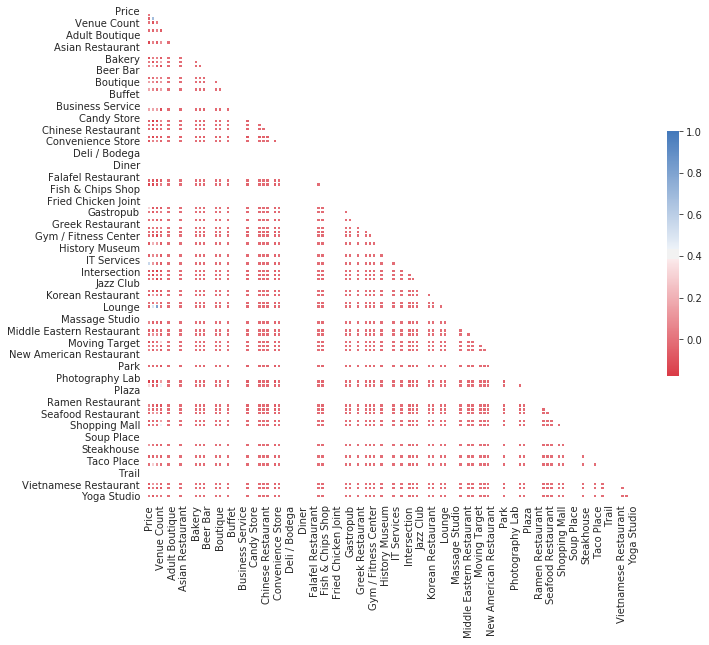

In [257]:
import seaborn as sns

# visualise the data with seaborn
corr = toronto_merged.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Feature Importance

In [248]:
y = toronto_merged.iloc[:, 1]
X = toronto_merged.iloc[:, 4:]

In [250]:
y.head()

0    9.931799e+05
1    7.945000e+04
2    2.490000e+05
3    1.290222e+06
4    1.365250e+06
Name: Price, dtype: float64

In [262]:
X.head()

,Venue Count,ATM,Accessories Store,Adult Boutique,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Taco Place,Thai Restaurant,Tourist Information Center,Trail,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
y_binned = pd.cut(y, bins=5, labels=["very low", "low", "medium", "high", "very high"])
y_binned.head()

0         low
1    very low
2    very low
3         low
4         low
Name: Price, dtype: category
Categories (5, object): [very low < low < medium < high < very high]

In [267]:
y_binned.shape

(84,)

In [273]:
features = toronto_merged.drop(['Neighborhood', 'Price', 'Latitude', 'Longitude'], axis=1).columns
features[0:10]

Index(['Venue Count', 'ATM', 'Accessories Store', 'Adult Boutique',
       'American Restaurant', 'Arts & Crafts Store', 'Asian Restaurant',
       'BBQ Joint', 'Bagel Shop', 'Bakery'],
      dtype='object')

### Logistic Regression with Lasso Regulariztion

In [276]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
num_feats= 121
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=num_feats)
embeded_lr_selector.fit(X, y_binned)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

3 selected features


/home/barzin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/barzin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [272]:
embeded_lr_feature

['Venue Count', 'Café', 'Pizza Place']

Three features were found to have the highest impact in predicting the price range. Vanue count is a feature that clearly makes sense as the more facilities and venues we have around a property, the more they affect the price. Cafe is another feature that has showed up again. We have seen it in the correlation analysis of the price. This also can be agood indicator, since the more cafes and restaurants we have around a property, the more central the property's location. 